In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,classification_report,mean_squared_error

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


1.5295160801216294

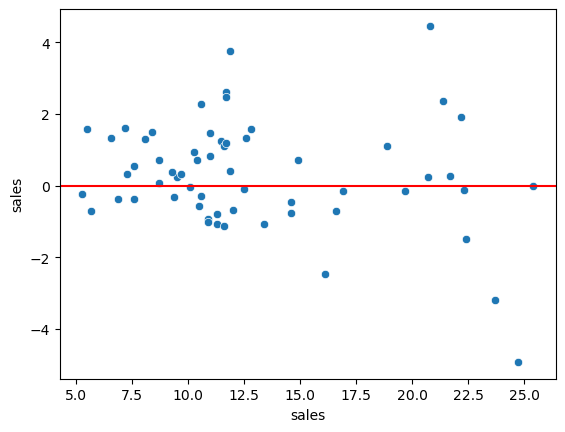

In [18]:
df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Advertising.csv')

X=df.drop(columns='sales')
y=df['sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

base_model=KNeighborsRegressor()
param_grid={
    'n_neighbors':[1,2,3,5,6,7,8,9,10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform','distance'],
    'p':[1,2]
}

model=GridSearchCV(estimator=base_model,param_grid=param_grid,cv=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred-y_test)
plt.axhline(0,color='red')

np.sqrt(mean_squared_error(y_pred,y_test))